# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensordash.tensordash import Tensordash

# GPU configuration

In [2]:
config=ConfigProto()
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

# Dataset Analysis

In [3]:
fconfig=pd.read_csv("dog-breed-identification/labels.csv")
y=fconfig.iloc[:,1].values

In [4]:
le=LabelEncoder()
y=le.fit_transform(y).reshape((-1,1))
ohe=OneHotEncoder(sparse=False)
y=ohe.fit_transform(y)

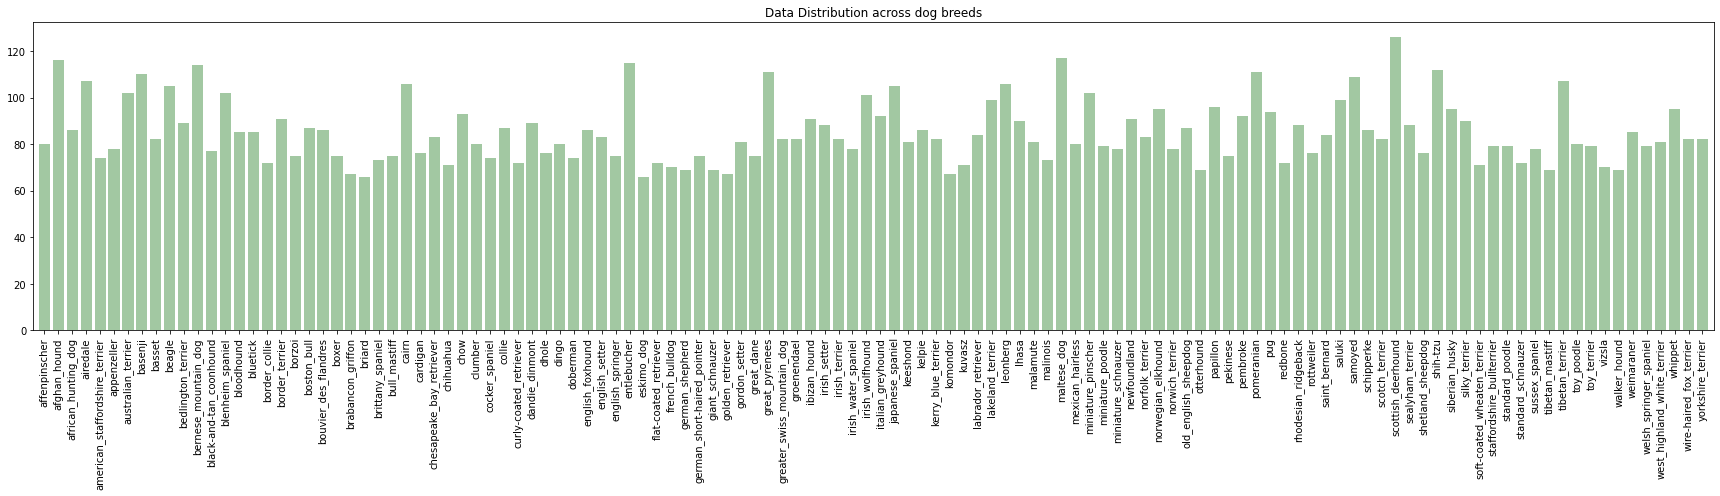

In [5]:
n=np.sum(y,axis=0)
names=list(le.classes_)
c=np.arange(0,n.shape[0])
fig=plt.figure(figsize=(24,7))
plt.bar(c,n,color="#a2c8a2")
plt.xticks(c, names, rotation='vertical')
plt.xlim((-0.8,n.shape[0]-0.2))
plt.title("Data Distribution across dog breeds")
plt.tight_layout()
plt.savefig('resources/data_analysis.png',dpi=300)
plt.show()

# Data Generator

In [6]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
batch_size=4

d_generator=gen.flow_from_directory(directory="dog-breed-identification/train", target_size=(128,128), color_mode='rgb', class_mode='categorical', batch_size=batch_size)

Found 10222 images belonging to 120 classes.


# Model Definition

In [8]:
resnet=ResNet152V2(include_top=False, weights='imagenet',input_shape=(128, 128, 3))

In [9]:
x=GlobalMaxPool2D()(resnet.output)
x= Dense(2048, activation='relu')(x)
x=Dense(120, activation='softmax')(x)
resnet.trainable=False
for layer in resnet.layers:
    layer.trainable=False
m=Model(resnet.input, x)

m.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
m.summary()

][0]          
                                                                 conv4_block31_3_conv[0][0]       
__________________________________________________________________________________________________
conv4_block32_preact_bn (BatchN (None, 8, 8, 1024)   4096        conv4_block31_out[0][0]          
__________________________________________________________________________________________________
conv4_block32_preact_relu (Acti (None, 8, 8, 1024)   0           conv4_block32_preact_bn[0][0]    
__________________________________________________________________________________________________
conv4_block32_1_conv (Conv2D)   (None, 8, 8, 256)    262144      conv4_block32_preact_relu[0][0]  
__________________________________________________________________________________________________
conv4_block32_1_bn (BatchNormal (None, 8, 8, 256)    1024        conv4_block32_1_conv[0][0]       
______________________________________________________________________________________________

# Callbacks

In [10]:
tdash=Tensordash(email='sagnik106@gmail.com', ModelName="Dog Breed Classifier")

# Training

In [11]:
with tf.device("/gpu:0"):
    hist=m.fit(d_generator, epochs=10, steps_per_epoch=10222//batch_size, verbose=1, callbacks=[tdash])

Epoch 1/10
2555/2555 [==============================] - 72s 28ms/step - loss: 4.0244 - accuracy: 0.3511
Epoch 2/10
2555/2555 [==============================] - 78s 31ms/step - loss: 1.6142 - accuracy: 0.5877
Epoch 3/10
2555/2555 [==============================] - 83s 32ms/step - loss: 0.9920 - accuracy: 0.7203
Epoch 4/10
2555/2555 [==============================] - 85s 33ms/step - loss: 0.5668 - accuracy: 0.8322
Epoch 5/10
2555/2555 [==============================] - 92s 36ms/step - loss: 0.3931 - accuracy: 0.8830
Epoch 6/10
2555/2555 [==============================] - 90s 35ms/step - loss: 0.3804 - accuracy: 0.8896
Epoch 7/10
2555/2555 [==============================] - 84s 33ms/step - loss: 0.2519 - accuracy: 0.9254
Epoch 8/10
2555/2555 [==============================] - 88s 35ms/step - loss: 0.2648 - accuracy: 0.9252
Epoch 9/10
2555/2555 [==============================] - 88s 35ms/step - loss: 0.2200 - accuracy: 0.9388
Epoch 10/10
2555/2555 [==============================] - 88s 35m

# Performance

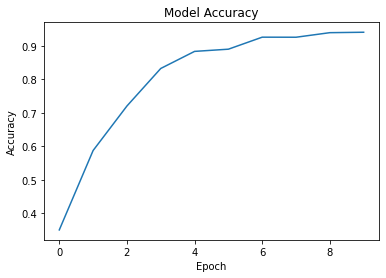

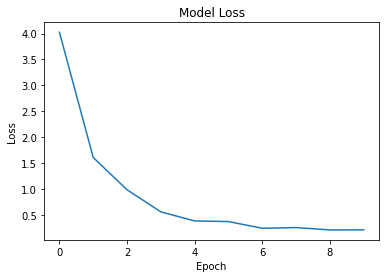

In [13]:
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('resources/accuracy.png')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('resources/loss.png')
plt.show()